##############################
# Diabete Feature Engineering

Problem : Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştirelim. Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmemiz gerekir.

##############################


In [1]:
#########################
# Veri Seti Hikayesi

# Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. 
# ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 
# 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 
# 768 gözlem ve 8 sayısal bağımsız değişkenden oluşmaktadır. 
# Hedef değişken "outcome" olarak belirtilmiş olup; 
# 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

# Değişkenler;

# Pregnancies: Hamilelik sayısı
# Glucose: Glikoz
# BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))
# SkinThickness: Cilt Kalınlığı
# Insulin: İnsülin.
# BMI: Beden kitle indeksi.
# DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
# Age: Yaş (yıl)
# Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)

In [2]:
# To do list;

# GÖREV 1: KEŞİFCİ VERİ ANALİZİ
           # Adım 1: Genel resmi inceleyelim.
           # Adım 2: Numerik ve kategorik değişkenleri yakalayalım.
           # Adım 3: Numerik ve kategorik değişkenlerin analizini yapalım.
           # Adım 4: Hedef değişken analizi yapalım. 
           #         (Kategorik değişkenlere göre hedef değişkenin ortalaması, 
           #         hedef değişkene göre numerik değişkenlerin ortalaması)
           # Adım 5: Aykırı gözlem analizi yapalım.
           # Adım 6: Eksik gözlem analizi yapalım.
           # Adım 7: Korelasyon analizi yapalım.

# GÖREV 2: FEATURE ENGINEERING
           # Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapalım. 
           #         Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb.
           #         değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. 
           #         Örneğin; bir kişinin glikoz veya insulin değeri 0 olamayacaktır. 
           #         Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp, 
           #         sonrasında eksik değerlere işlemleri uygulayabilirsiniz.
           # Adım 2: Yeni değişkenler oluşturalım.
           # Adım 3: Encoding işlemlerini gerçekleştirelim.
           # Adım 4: Numerik değişkenler için standartlaştırma yapalım.
           # Adım 5: Model oluşturalım.

In [3]:
# Kütüphane ve fonksiyonlarımızı import edelim;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings

import et_analysis as et

In [4]:
# warnings ve pandas ayarlamalarımızı yapalım;

warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Görev 1:

In [5]:
# Verimizi okutalım ve hızlı bir bakış atalım;

df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [6]:
# Verinin genel resmine bakalım;

et.check_df(df, display_=True)

##################### Shape #####################
(768, 9)
##################### Types #####################


,DataType
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


##################### Head #####################


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


##################### Tail #####################


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


##################### NA #####################


,# of N/A value
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##################### Quantiles #####################


,0.000,0.010,0.050,0.250,0.500,0.750,0.950,0.990,1.000
Pregnancies,0.000,0.000,0.000,1.000,3.000,6.000,10.000,13.000,17.000
Glucose,0.000,57.000,79.000,99.000,117.000,140.250,181.000,196.000,199.000
BloodPressure,0.000,0.000,38.700,62.000,72.000,80.000,90.000,106.000,122.000
SkinThickness,0.000,0.000,0.000,0.000,23.000,32.000,44.000,51.330,99.000
Insulin,0.000,0.000,0.000,0.000,30.500,127.250,293.000,519.900,846.000
BMI,0.000,0.000,21.800,27.300,32.000,36.600,44.400,50.760,67.100
DiabetesPedigreeFunction,0.080,0.090,0.140,0.240,0.370,0.630,1.130,1.700,2.420
Age,21.000,21.000,21.000,24.000,29.000,41.000,58.000,67.000,81.000
Outcome,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


    Yukarıda verinin 768 gözlemden ve 9 değişkenden oluştuğunu görebiliyoruz. Veri de boş değer yok gibi gözüküyor. Lakin açıklama kısmından, boş yerlere 0 atandığını biliyoruz. İlgili Quantiles değerlerini görüyoruz ve veri sayısal değerlerden oluşuyor.

In [7]:
# Numerik ve kategorik değerleri yakalayalım;

cat_cols, num_cols, cat_but_car, num_but_cat =et.grab_col_names(df, var_name=True, var_num=True)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


########## cat_cols ##########
['Outcome']
########## num_cols ##########
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
########## cat_but_car ##########
[]
########## num_but_cat ##########
['Outcome']




    9 değişkenin 9'u da numerik bunu görebiliyoruz, lakin "Outcome" değişkeni numerki gözükmesine rağmen kategorik bir değişkendir.

   Outcome  Ratio
0      500 65.100
1      268 34.900
##########################################


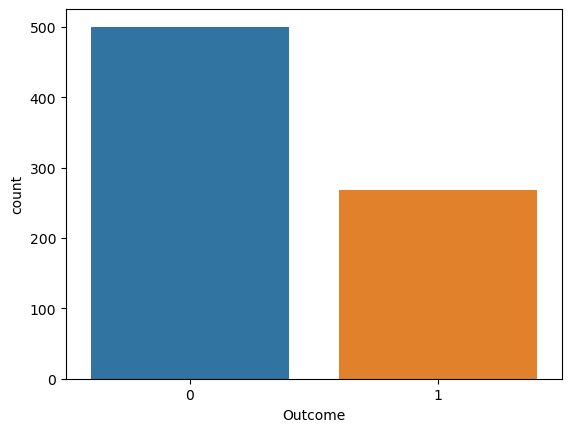

In [8]:
# Kategorik değişkeni analiz edelim;

et.cat_summary(df, "Outcome", plot=True)

count   768.000
mean      3.845
std       3.370
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


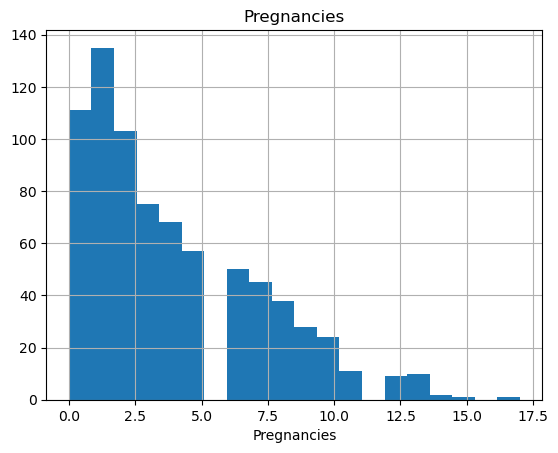

count   768.000
mean    120.895
std      31.973
min       0.000
1%       57.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


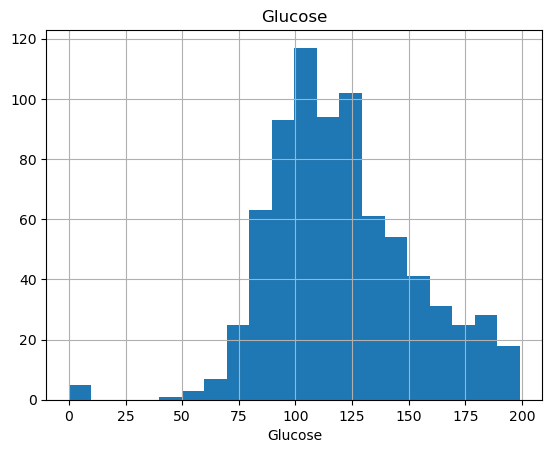

count   768.000
mean     69.105
std      19.356
min       0.000
1%        0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


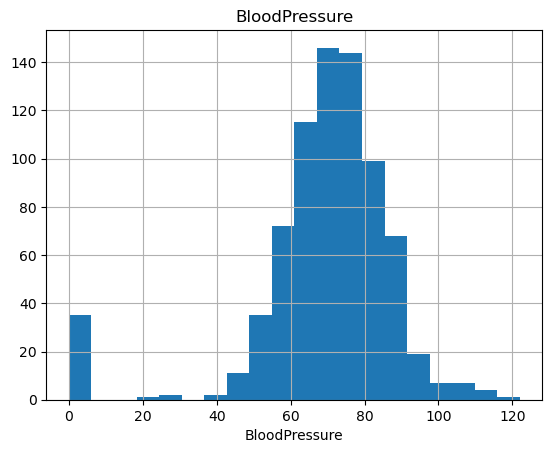

count   768.000
mean     20.536
std      15.952
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


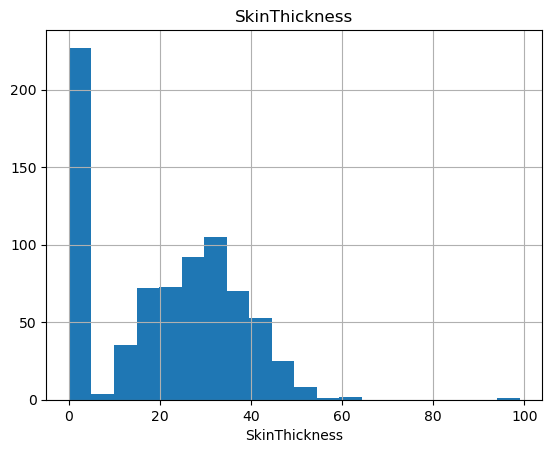

count   768.000
mean     79.799
std     115.244
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


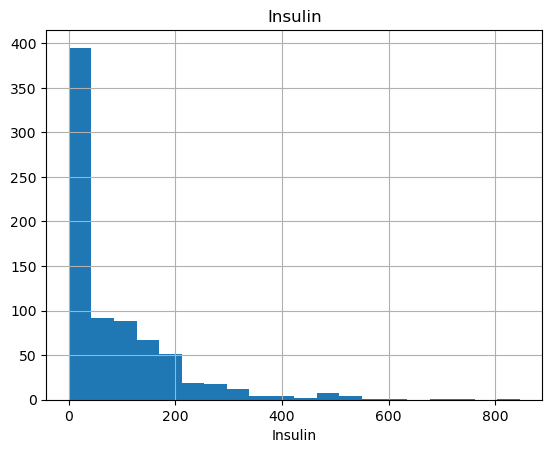

count   768.000
mean     31.993
std       7.884
min       0.000
1%        0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


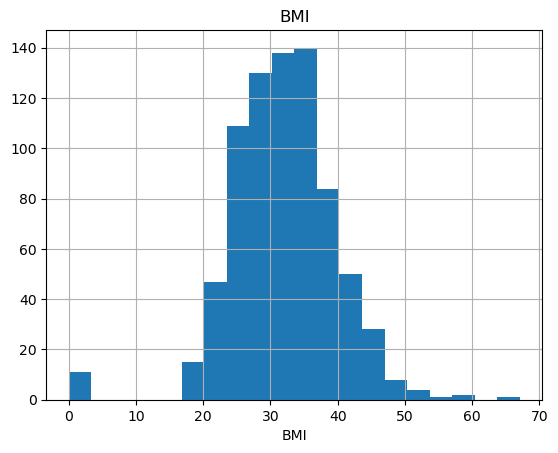

count   768.000
mean      0.472
std       0.331
min       0.078
1%        0.095
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


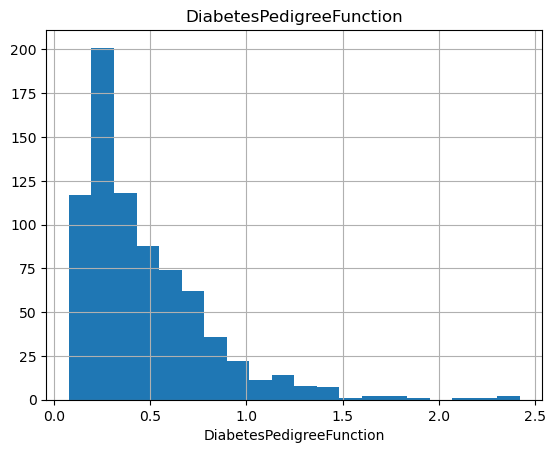

count   768.000
mean     33.241
std      11.760
min      21.000
1%       21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


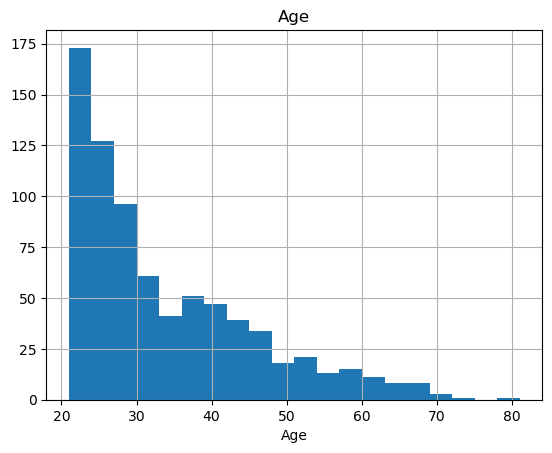

In [9]:
# Numerik değişkenleri analiz edelim;

for col in num_cols:
    et.num_summary(df, col, plot=True)

    Yukarıdaki grafikler incelendiğinde 0'ın bazı grafiklerde aykırı bir değer olduğu grafikten de anlaşılabilmektedir.

In [10]:
# Numerik değişkenlerin target değişken ile analizine bakalım;

for col in num_cols:
    et.target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




In [11]:
# Değişkenler arasındaki korelasyona bakalım;

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


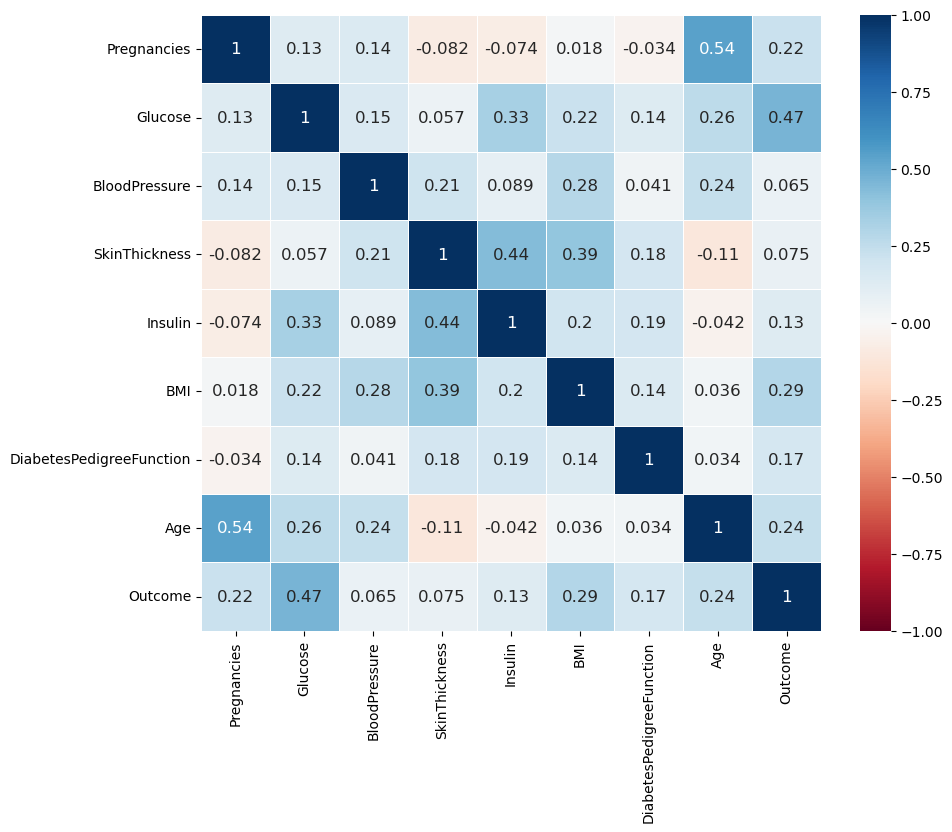

In [12]:
# Bu tablonun heatmap grafiğine bakalım;

et.correlation_matrix(df, df.columns)

    Yüksek korelasyonlu değişkenler bulunmamaktadır. Age ile pragnencies görece yüksek korelasyonlu denebilir.

In [13]:
# Veri üzerinde hiçbir feature engineering faaliyetinde bulunmadan base bir model kurup, modeli değerlendirelim;

# Bağımlı ve bağımsız değişkenlerimizi belirleyelim;
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

# Verimizi train ve test olarak ikiye ayıralım;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [14]:
# Model nesnemizi çağırıp, train veri setini fit edelim;
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Train edilmiş model üzerinden, test veri setini tahmin edelim;
y_pred = rf_model.predict(X_test)

In [15]:
# Model değerlendirme metriklerimizi çağıralım;

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


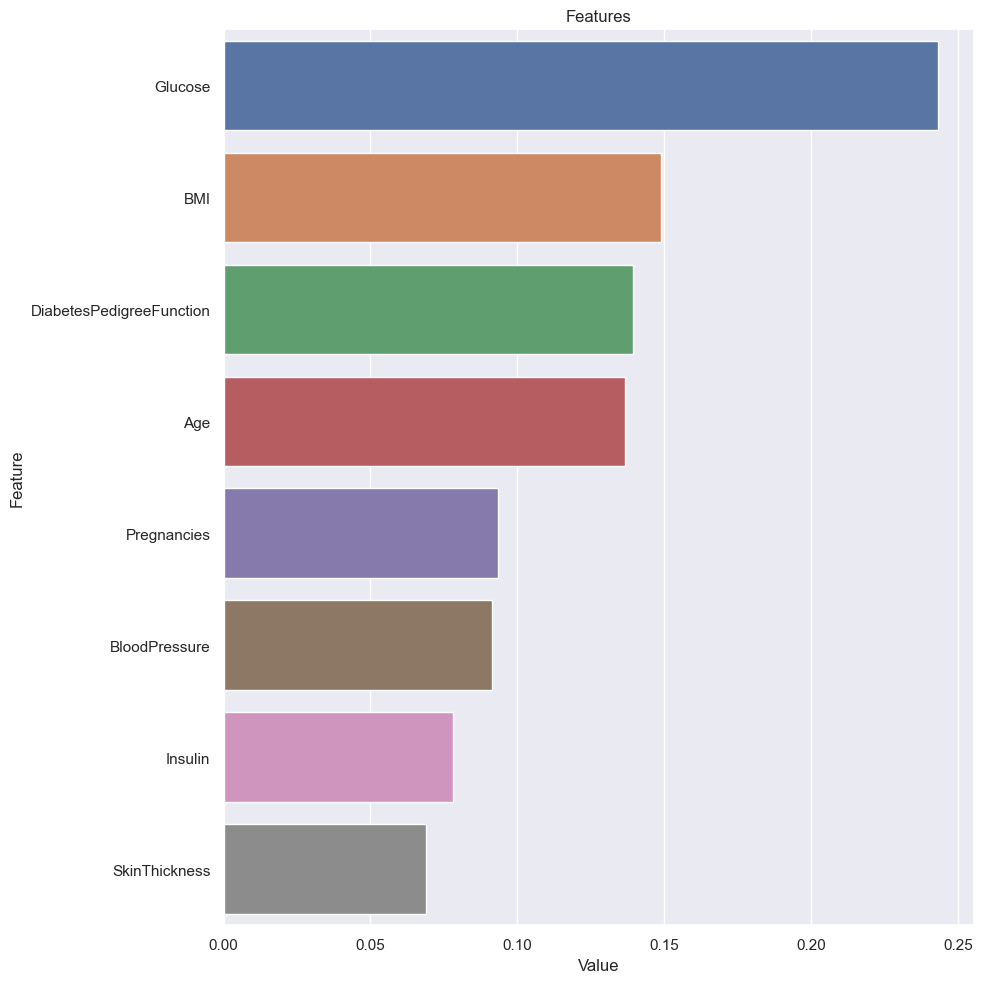

In [16]:
et.plot_importance(rf_model, X, num=len(X))

    Yukarıdaki görselden anlıyoruz ki, modelimiz en önemli özellik olarak Glucose'u seçmiş ve ardından BMI, DiabetesPedigreeFunciton ve Age gelmiştir.

### Görev 2:

In [17]:
# Eksik değerlerin analizini yapalım;

# Bir insanda Pregnancies ve Outcome dışındaki değişken değerleri 0 olamayacağını tahmin edebiliyoruz.
# Bundan dolayı bu değerlerle ilgili bir şeyler yapmalıyız. 0 olan değerlere NaN atayalım;

zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [18]:
# Gözlem birimlerinde 0 olan degiskenlerin her birisine gidip 0 iceren gozlem degerlerini NaN ile değiştirelim;
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [19]:
# Eksik Gözlem Analizi
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Hangi değişkende kaç adet eksik gözlem ve eksik gözlemlerin yüzdelerini görelim;

na_columns = et.missing_values_table(df, na_name=True)
na_columns

               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [21]:
# Eksik değerlerin target değişken ile ilişkilerine bakalım;
et.missing_vs_target(df, "Outcome", na_columns)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11




In [22]:
# Eksik Değerleri median ile dolduralım;
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [23]:
# Eksik değer kalmış mı kontrol edelim;
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in df.columns:
    print(col, et.check_outlier(df, col))
    if et.check_outlier(df, col):
        et.replace_with_thresholds(df, col)

Pregnancies True
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


    Glucose ve Outcome dışında bütün değişkenlerde aykırı değer bulunmaktadır. Aykırı değerleri de yukarıdaki döngü ile baskıladık.

In [25]:
# Kontrol edelim, aykırı değer kalmış mı?

for col in df.columns:
    print(col, et.check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


    Kalmamış :)

In [26]:
# Feature Engineering

# Yaş değişkenini kategorilere ayırıp yeni yaş değişkeni oluşturalım;
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

# BMI 18,5 aşağısı underweight, 18.5 ile 24.9 arası normal, 
# 24.9 ile 29.9 arası Overweight ve 30 üstü obez olarak tanımlayalım;
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                       labels=["Underweight", "Healthy", "Overweight", "Obese"])

# Glukoz degerini kategorik değişkene çevirelim;
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

# Yaş ve beden kitle indeksini bir araya getirerek 8 yeni değişken oluşturalım;
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

# Yaş ve Glikoz değerlerini bir arada getirerek 8 yeni değişken oluşturalım;
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [27]:
# Verimizin son haline hızlıca bakalım;

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature


In [28]:
# İnsulin Değeri ile Kategorik değişken oluşturavak bir fonksiyon tanımlayalım;
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [29]:
# df'mizi bu fonksiyondan geçirelim;

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

In [30]:
# Verimizin son haline hızlıca bakalım;

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature,Normal


In [31]:
# glucose ile inisülini çarparak yeni bir değişken oluşturalım;
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

# Verimizin son haline hızlıca bakalım;
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.000
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.000
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.000
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10045.875
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature,Normal,18614.875


In [32]:
# glucose ile pregnancies çarparak yeni bir değişken oluşturalım;
# Hamilelik değeri 0 olanlara dikkat edelim!!!

df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * (1+ df["Pregnancies"])

# Verimizin son haline hızlıca bakalım;
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.000,1036.000
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.000,170.000
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.000,1647.000
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10045.875,178.000
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,mature,Obese,Normal,obesemature,highmature,Normal,18614.875,137.000


In [33]:
# Sütun isimlerini standartlaştıralım;
df.columns = [col.upper() for col in df.columns]

In [34]:
# Encoding

# Bir çok feature ürettiğimiz için değişkenlerimizi yeniden inceleyelim;

cat_cols, num_cols, cat_but_car, num_but_cat = et.grab_col_names(df, var_name=True, var_num=True)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


########## cat_cols ##########
['NEW_AGE_CAT', 'NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_INSULIN_SCORE', 'OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']
########## num_cols ##########
['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'NEW_GLUCOSE*INSULIN', 'NEW_GLUCOSE*PREGNANCIES']
########## cat_but_car ##########
[]
########## num_but_cat ##########
['OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']




    17 değişken olduğunu görüyoruz, bunlardan 7 tanesi kategorik, 10 tanesi ise numerik değişkendir. 3 değişken ise numerik olarak gözükmekte olup aslında ketegorik değişkendir.

In [35]:
# Artık değişkenlerimizi encode edeceğiz, binary değişkenleri yakalayalım ilk önce;

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT']

In [36]:
# Bu değişkeni encode edelim;

for col in binary_cols:
    df = et.label_encoder(df, col)

In [37]:
# Kategorik değişkenlerimizi yakalayalım;

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [38]:
# Bu değişkeneleri one_hot encode edelim;
df = et.one_hot_encoder(df, cat_cols, drop_first=True)

# Verimize hızlı bir bakış atalım;
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6.000,148.000,72.000,35.000,125.000,33.600,0.627,50.000,1,1,18500.000,1036.000,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,1.000,85.000,66.000,29.000,125.000,26.600,0.351,31.000,0,0,10625.000,170.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,8.000,183.000,64.000,29.000,125.000,23.300,0.672,32.000,1,0,22875.000,1647.000,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,1.000,89.000,66.000,23.000,112.875,28.100,0.167,21.000,0,0,10045.875,178.000,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0.000,137.000,40.000,35.000,135.875,43.100,1.200,33.000,1,0,18614.875,137.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [40]:
# Standartlaştırma
print(num_cols)

# Scaler nesnemizi çağıralım;
scaler = StandardScaler()
# Numerik değişkenleri nesnemizden geçirelim;
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verimize hızlı bir bakış atalım;
df.head()

['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'NEW_GLUCOSE*INSULIN', 'NEW_GLUCOSE*PREGNANCIES']


,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES,NEW_AGE_BMI_NOM_obesesenior,NEW_AGE_BMI_NOM_underweightmature,NEW_AGE_GLUCOSE_NOM_hiddensenior,NEW_AGE_GLUCOSE_NOM_highmature,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,0.647,0.866,-0.031,0.825,0.039,0.181,0.589,1.446,1,1,0.750,0.926,1,0,0,0,1,0,0,0,0,0,0,1,1,0
1,-0.849,-1.205,-0.544,0.018,0.039,-0.869,-0.378,-0.189,0,0,-1.078,-0.919,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,1.246,2.017,-0.715,0.018,0.039,-1.365,0.747,-0.103,1,0,1.766,2.228,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,-0.849,-1.074,-0.544,-0.789,-1.494,-0.644,-1.023,-1.050,0,0,-1.212,-0.902,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,-1.148,0.504,-2.768,0.825,1.414,1.607,2.597,-0.017,1,0,0.777,-0.989,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [41]:
# Verimiz üzerinde yeterince çalıştık ve eksik değerler, aykırı değer problemlerini çözdük.
# Daha sonrasında ise feature engineering yaptık ve numerik veri üzerinde standartleştırma işlemi gerçekleştirdik.

# Artık model kurma vakti.

# Bağımlı ve bağımsız değişkenlerimizi belirleyelim;
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

# Verimizi test ve train olmak üzere ikiye bölelim;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Model nesnemizi çağıralım ve train verisini fit edelim;
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Test verisi üzerinden tahminde bulunalım;
y_pred = rf_model.predict(X_test)

In [42]:
# Başarı metriklerini çağıralım;
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.8
Recall: 0.746
Precision: 0.65
F1: 0.7
Auc: 0.79


In [43]:
# Base modeldeki başarı metriklerimiz aşağıdadır;
# Çabalarımız sonuç vermiş gibi gözüküyor.

# Base Model
# Accuracy: 0.77
# Recall: 0.706
# Precision: 0.59
# F1: 0.64
# Auc: 0.75

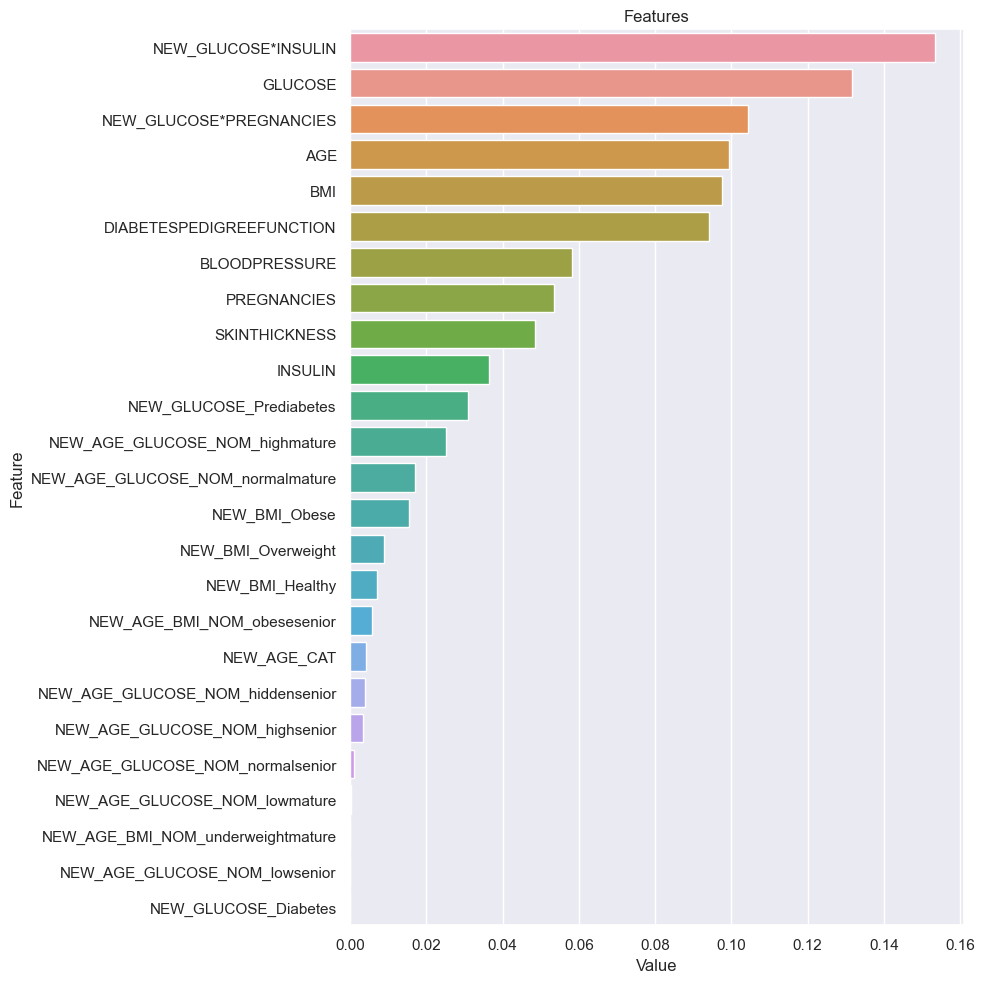

In [44]:
# Özellik önemlerine bakalım;

et.plot_importance(rf_model, X, num=len(X))

    Oluşturduğumuz NEW_GLUCOSE*INISULIN VE NEW_GLUCOSE*PREGNINCIES modelimiz için önemli özellikler haline gelmiş :)